In [1]:
import pandas as pd
import yellowbrick
import matplotlib.pyplot as plt
from yellowbrick.features import Rank2D
from yellowbrick.style import set_palette
from yellowbrick.features import ParallelCoordinates
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import RFECV
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression

In [2]:
addr1 = "/Users/Nicole/Documents/550DataMining/OriginalCaseStudy/winequality-red.csv"
data = pd.read_csv(addr1)
print("The dimension of the table is: ", data.shape)

The dimension of the table is:  (1599, 12)


In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
print("Data Summary:")
print(data.describe())

Data Summary:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.0

In [5]:
for c in data.columns:
    miss = data[c].isnull().sum()
    if miss>0:
        print("{} has {} missing value(s)".format(c,miss))
    else:
        print("{} has no missing values".format(c))

fixed acidity has no missing values
volatile acidity has no missing values
citric acid has no missing values
residual sugar has no missing values
chlorides has no missing values
free sulfur dioxide has no missing values
total sulfur dioxide has no missing values
density has no missing values
pH has no missing values
sulphates has no missing values
alcohol has no missing values
quality has no missing values


In [6]:
plt.rcParams['figure.figsize'] = (20, 20)

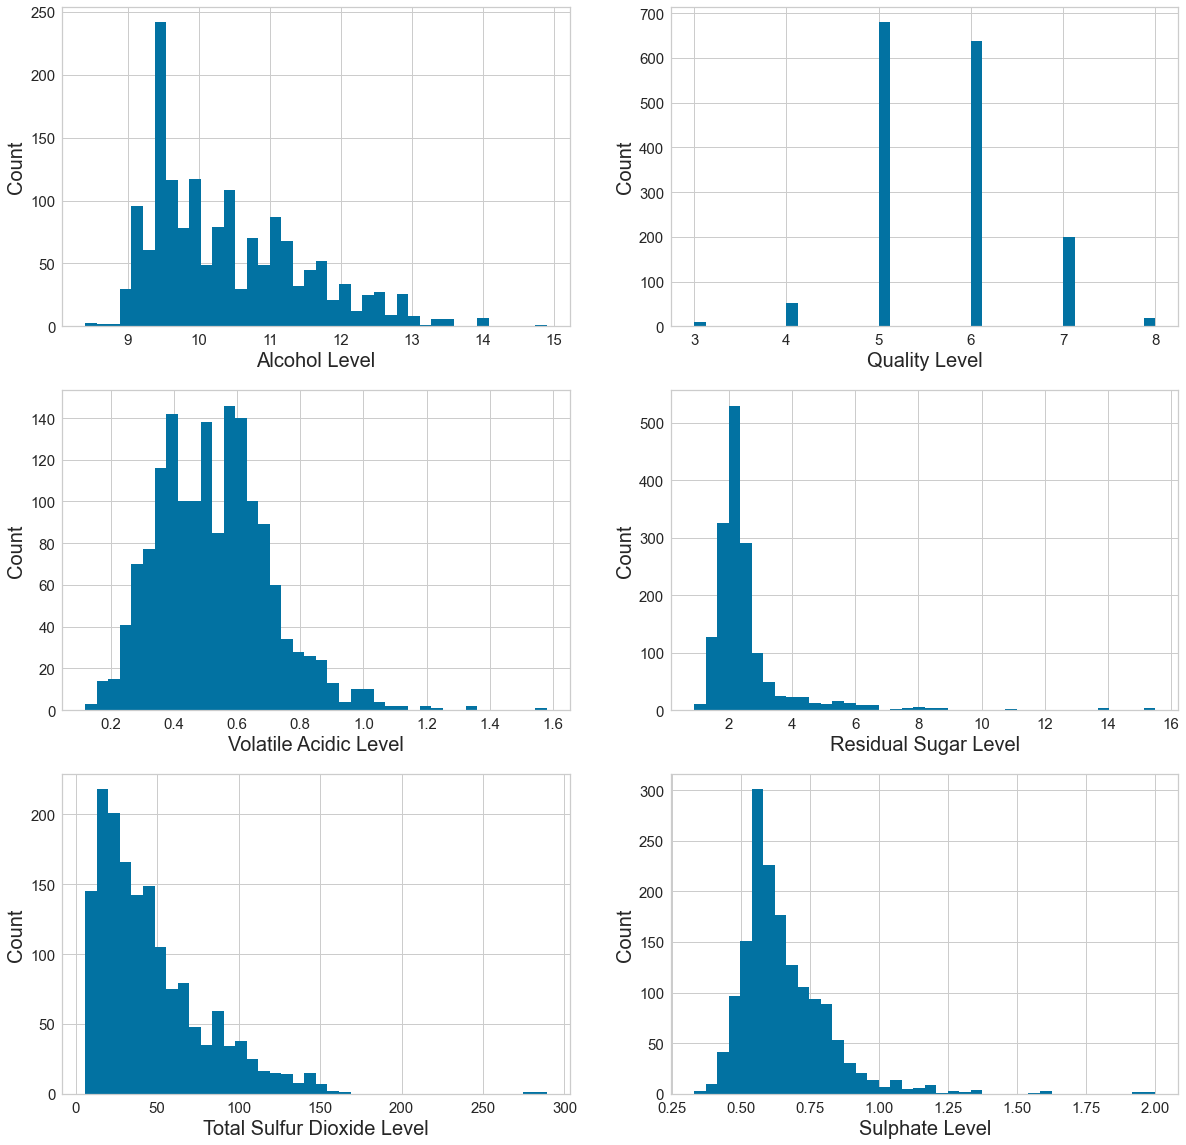

In [7]:
fig, axes = plt.subplots(nrows = 3, ncols = 2)
num_features = ['alcohol', 'quality', 'volatile acidity', 'residual sugar', 'total sulfur dioxide', 'sulphates']
xaxes = ['Alcohol Level', 'Quality Level', 'Volatile Acidic Level', 'Residual Sugar Level', 
         'Total Sulfur Dioxide Level', 'Sulphate Level']
yaxes = ['Count', 'Count', 'Count', 'Count', 'Count', 'Count']
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(data[num_features[idx]], bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)

In [8]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

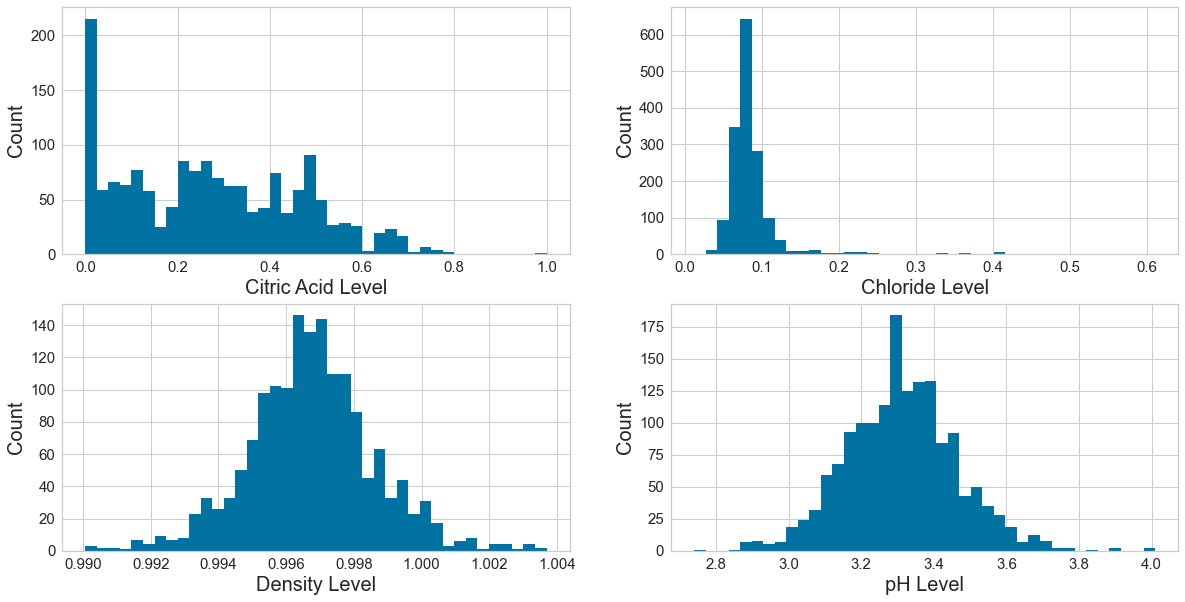

In [9]:
fig, axes = plt.subplots(nrows = 2, ncols = 2)
num_features2 = ['citric acid', 'chlorides', 'density', 'pH']
xaxes = ['Citric Acid Level', 'Chloride Level', 'Density Level', 'pH Level']
yaxes = ['Count', 'Count', 'Count', 'Count']
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(data[num_features2[idx]], bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)

In [10]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)

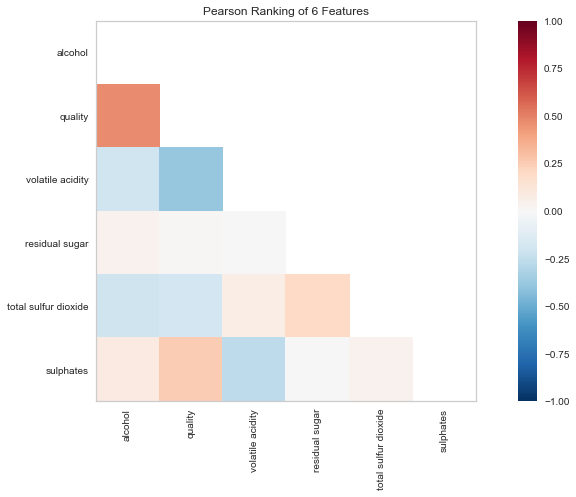

In [11]:
X = data[["alcohol", "quality", "volatile acidity", "residual sugar", "total sulfur dioxide", "sulphates"]].values
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)
visualizer.transform(X)
visualizer.show()

In [12]:
def log_transformation(data):
    return data.apply(np.log1p)

In [13]:
data['Alcohol_log1p'] = log_transformation(data['alcohol'])

In [14]:
data['ResidualSugar_log1p'] = log_transformation(data['residual sugar'])

In [15]:
data['TotalSulfurDioxide_log1p'] = log_transformation(data['total sulfur dioxide'])

In [16]:
data['Sulphates_log1p'] = log_transformation(data['sulphates'])

In [17]:
data['Chlorides_log1p'] = log_transformation(data['chlorides'])

In [18]:
print(data.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [19]:
plt.rcParams['figure.figsize'] = (10, 5)

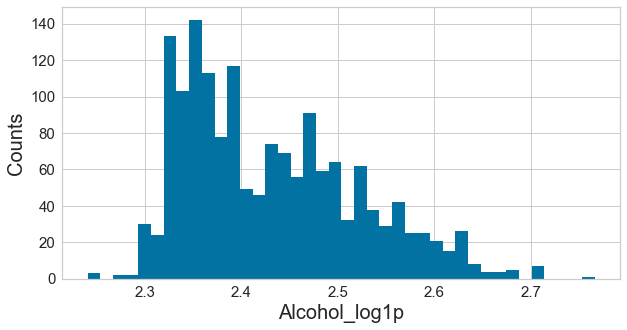

In [20]:
plt.hist(data['Alcohol_log1p'], bins=40)
plt.xlabel('Alcohol_log1p', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
plt.show()

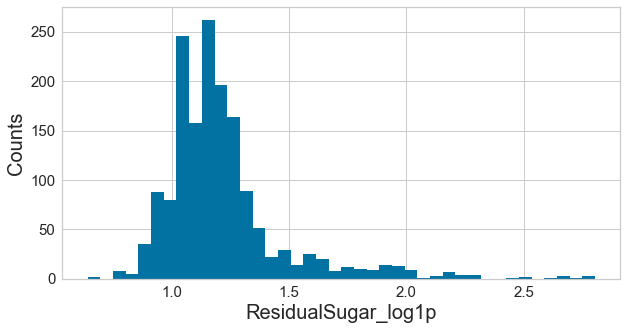

In [21]:
plt.hist(data['ResidualSugar_log1p'], bins=40)
plt.xlabel('ResidualSugar_log1p', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
plt.show()

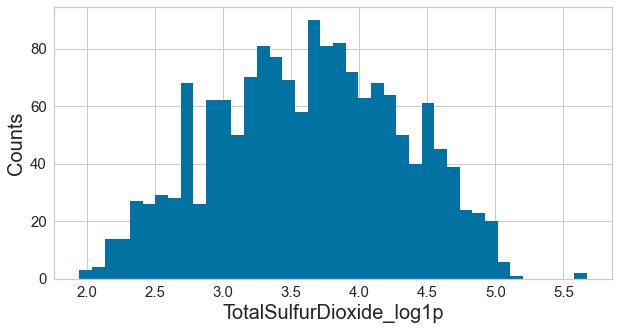

In [22]:
plt.hist(data['TotalSulfurDioxide_log1p'], bins=40)
plt.xlabel('TotalSulfurDioxide_log1p', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
plt.show()

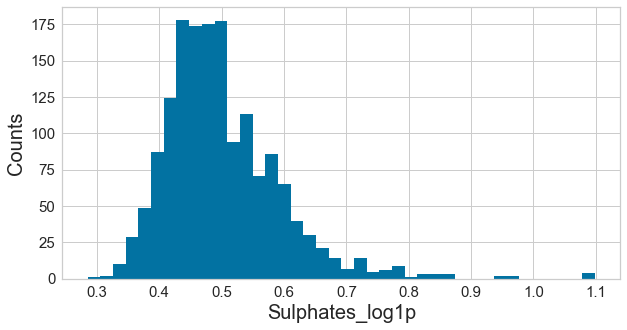

In [23]:
plt.hist(data['Sulphates_log1p'], bins=40)
plt.xlabel('Sulphates_log1p', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
plt.show()

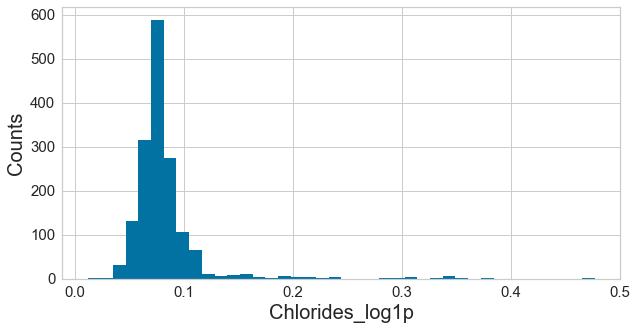

In [24]:
plt.hist(data['Chlorides_log1p'], bins=40)
plt.xlabel('Chlorides_log1p', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
plt.show()

In [25]:
array = data.values
X = array[:,0:16]
Y = array[:,16]

In [26]:
thresholder = VarianceThreshold(threshold=.5)

In [27]:
X_HighVariance = thresholder.fit_transform(X)

In [28]:
X_HighVariance[0:16]

array([[  7.4,   1.9,  11. ,  34. ,   9.4,   5. ],
       [  7.8,   2.6,  25. ,  67. ,   9.8,   5. ],
       [  7.8,   2.3,  15. ,  54. ,   9.8,   5. ],
       [ 11.2,   1.9,  17. ,  60. ,   9.8,   6. ],
       [  7.4,   1.9,  11. ,  34. ,   9.4,   5. ],
       [  7.4,   1.8,  13. ,  40. ,   9.4,   5. ],
       [  7.9,   1.6,  15. ,  59. ,   9.4,   5. ],
       [  7.3,   1.2,  15. ,  21. ,  10. ,   7. ],
       [  7.8,   2. ,   9. ,  18. ,   9.5,   7. ],
       [  7.5,   6.1,  17. , 102. ,  10.5,   5. ],
       [  6.7,   1.8,  15. ,  65. ,   9.2,   5. ],
       [  7.5,   6.1,  17. , 102. ,  10.5,   5. ],
       [  5.6,   1.6,  16. ,  59. ,   9.9,   5. ],
       [  7.8,   1.6,   9. ,  29. ,   9.1,   5. ],
       [  8.9,   3.8,  52. , 145. ,   9.2,   5. ],
       [  8.9,   3.9,  51. , 148. ,   9.2,   5. ]])

In [29]:
thresholder.fit(X).variances_

array([3.02952057e+00, 3.20423261e-02, 3.79237511e-02, 1.98665392e+00,
       2.21375732e-03, 1.09346457e+02, 1.08142564e+03, 3.55980179e-06,
       2.38202742e-02, 2.87146470e-02, 1.13493717e+00, 6.51760540e-01,
       8.17322110e-03, 7.28377874e-02, 4.65616700e-01, 8.78005301e-03])

In [30]:
ols = linear_model.LinearRegression()

In [31]:
rfecv = RFECV(estimator=ols, step=1, scoring="neg_mean_squared_error")
rfecv.fit(X,Y)
rfecv.transform(X)

array([[ 0.        ,  0.076     ,  0.9978    , ...,  9.4       ,
         2.34180581,  0.44468582],
       [ 0.        ,  0.098     ,  0.9968    , ...,  9.8       ,
         2.37954613,  0.51879379],
       [ 0.04      ,  0.092     ,  0.997     , ...,  9.8       ,
         2.37954613,  0.50077529],
       ...,
       [ 0.13      ,  0.076     ,  0.99574   , ..., 11.        ,
         2.48490665,  0.55961579],
       [ 0.12      ,  0.075     ,  0.99547   , ..., 10.2       ,
         2.41591378,  0.53649337],
       [ 0.47      ,  0.067     ,  0.99549   , ..., 11.        ,
         2.48490665,  0.5068176 ]])

In [50]:
r_sq = rfecv.score(X, Y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.9967977520192794


In [32]:
# best features
rfecv.n_features_

8

In [33]:
rfecv.support_

array([False, False,  True, False,  True, False, False,  True,  True,
        True,  True, False,  True, False, False,  True])

In [34]:
# view data to see position of variables according to outcome above 
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Alcohol_log1p,ResidualSugar_log1p,TotalSulfurDioxide_log1p,Sulphates_log1p,Chlorides_log1p
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,2.431458,1.218131,3.634750,0.501073,0.083038
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.090434,0.269969,0.682575,0.093731,0.038991
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,2.240710,0.641854,1.945910,0.285179,0.011929
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,2.351375,1.064711,3.135494,0.438255,0.067659
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,2.415914,1.163151,3.663562,0.482426,0.076035
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,2.493205,1.280934,4.143135,0.548121,0.086178
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,2.766319,2.803360,5.669881,1.098612,0.476855


In [35]:
# Citric acid, chlorides, density, pH, sulphates, alcohol, alcohol_log1p, sulphates_log1p are the best categories/
# features. We will keep these and drop the rest.
df2 = data.drop(["volatile acidity", "residual sugar", "free sulfur dioxide", "total sulfur dioxide",
        "quality", "ResidualSugar_log1p", "TotalSulfurDioxide_log1p", "Chlorides_log1p"], axis=1)

In [36]:
df2

,fixed acidity,citric acid,chlorides,density,pH,sulphates,alcohol,Alcohol_log1p,Sulphates_log1p
0,7.4,0.00,0.076,0.99780,3.51,0.56,9.4,2.341806,0.444686
1,7.8,0.00,0.098,0.99680,3.20,0.68,9.8,2.379546,0.518794
2,7.8,0.04,0.092,0.99700,3.26,0.65,9.8,2.379546,0.500775
3,11.2,0.56,0.075,0.99800,3.16,0.58,9.8,2.379546,0.457425
4,7.4,0.00,0.076,0.99780,3.51,0.56,9.4,2.341806,0.444686
...,...,...,...,...,...,...,...,...,...
1594,6.2,0.08,0.090,0.99490,3.45,0.58,10.5,2.442347,0.457425
1595,5.9,0.10,0.062,0.99512,3.52,0.76,11.2,2.501436,0.565314
1596,6.3,0.13,0.076,0.99574,3.42,0.75,11.0,2.484907,0.559616
1597,5.9,0.12,0.075,0.99547,3.57,0.71,10.2,2.415914,0.536493


In [40]:
# split the data
df3 = data['quality']
df3

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [41]:
model2 = LinearRegression().fit(df2, df3)

In [42]:
r_sq = model2.score(df2, df3)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.3465711199522705


In [44]:
df4 = data.drop(["quality"], axis=1)
df4.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Alcohol_log1p,ResidualSugar_log1p,TotalSulfurDioxide_log1p,Sulphates_log1p,Chlorides_log1p
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2.341806,1.064711,3.555348,0.444686,0.073250
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2.379546,1.280934,4.219508,0.518794,0.093490
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2.379546,1.193922,4.007333,0.500775,0.088011
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,2.379546,1.064711,4.110874,0.457425,0.072321
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2.341806,1.064711,3.555348,0.444686,0.073250


In [45]:
model3 = LinearRegression().fit(df4,df3)

In [47]:
r_sq = model3.score(df4, df3)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.3838876704795361


In [48]:
model4 = LinearRegression().fit(X,df3)

In [49]:
r_sq = model4.score(X, df3)
print('coefficient of determination:', r_sq)

coefficient of determination: 1.0
